In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 35.3MB/s]


In [4]:
!unzip \*.zip  && rm *.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [5]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.columns.values
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: ylabel='Churn'>

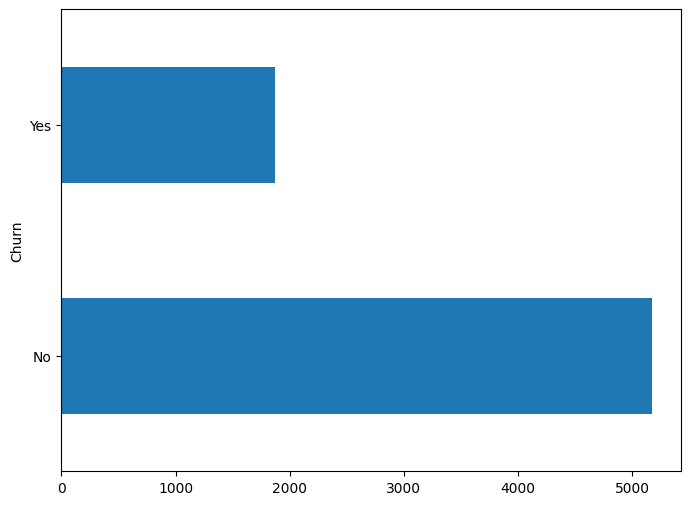

In [9]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8,6))

In [10]:
(data['Churn'].value_counts()/len(data['Churn']))*100
#imbalanced data

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [11]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
miss = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
print(miss)
#no missing data here

               index    0
0         customerID  0.0
1             gender  0.0
2      SeniorCitizen  0.0
3            Partner  0.0
4         Dependents  0.0
5             tenure  0.0
6       PhoneService  0.0
7      MultipleLines  0.0
8    InternetService  0.0
9     OnlineSecurity  0.0
10      OnlineBackup  0.0
11  DeviceProtection  0.0
12       TechSupport  0.0
13       StreamingTV  0.0
14   StreamingMovies  0.0
15          Contract  0.0
16  PaperlessBilling  0.0
17     PaymentMethod  0.0
18    MonthlyCharges  0.0
19      TotalCharges  0.0
20             Churn  0.0


In [13]:
#Data Cleaning
data_copy = data.copy()

In [14]:
data_copy.TotalCharges = pd.to_numeric(data_copy.TotalCharges, errors='coerce')
data_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
(data_copy.isnull().sum()/data_copy.shape[0])*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [16]:
data_copy.loc[data_copy['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
data_copy.dropna(how='any', inplace=True)
#now we have 11 less rows

In [18]:
#for tenure column create bins because so many years
data_copy['tenure'].max()

72

In [19]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]
data_copy['tenure_group'] = pd.cut(data_copy.tenure, range(1, 80, 12), right=False, labels=labels)
data_copy['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [20]:
data_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


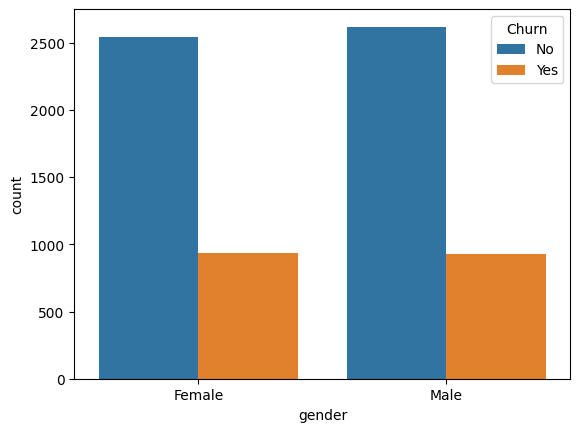

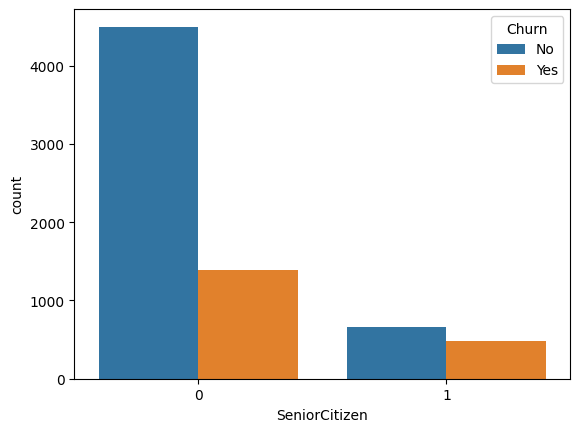

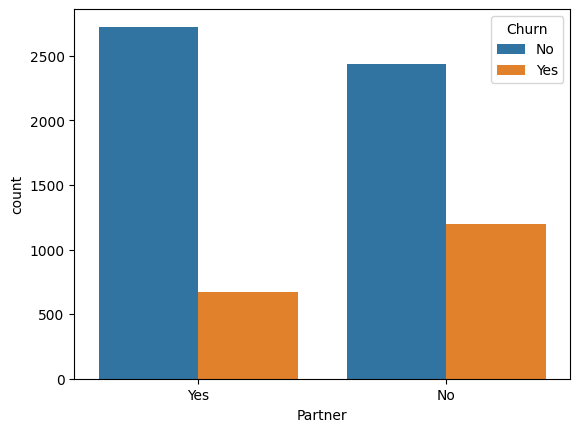

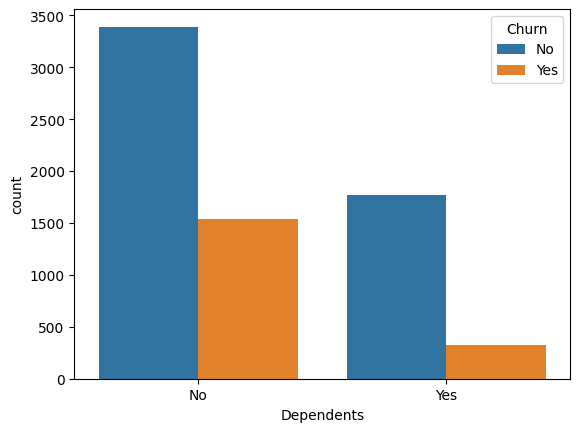

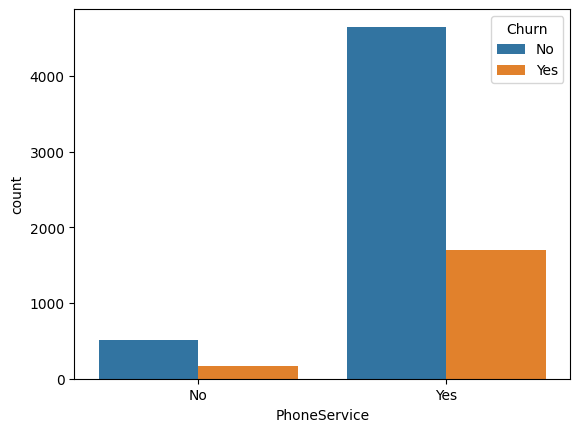

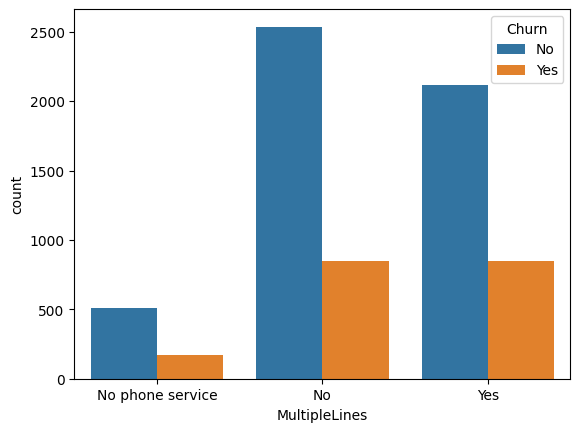

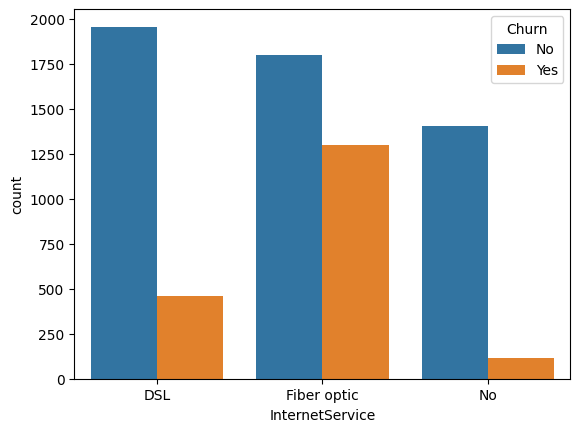

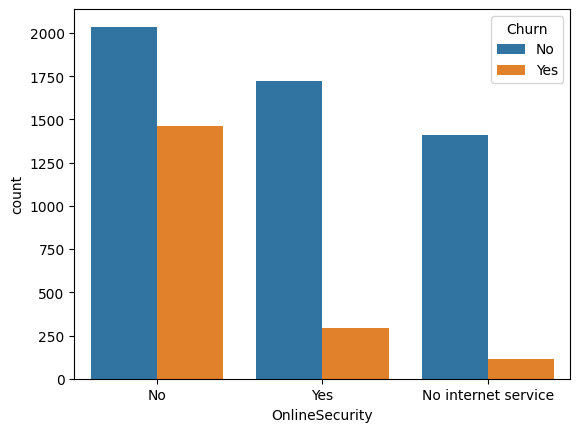

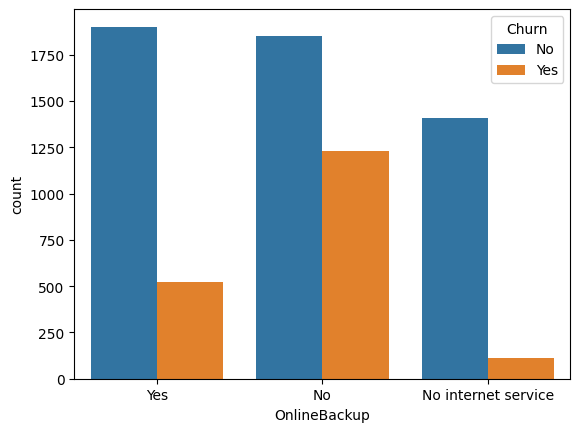

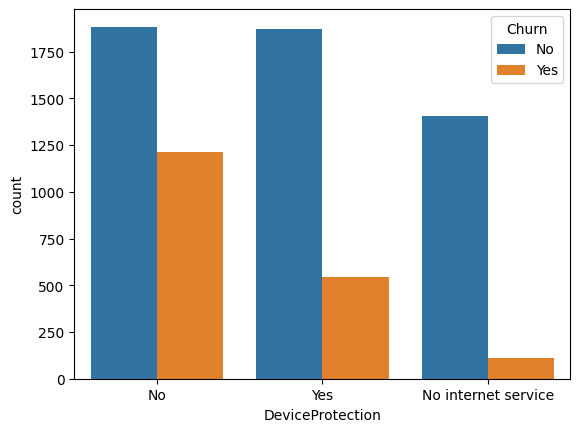

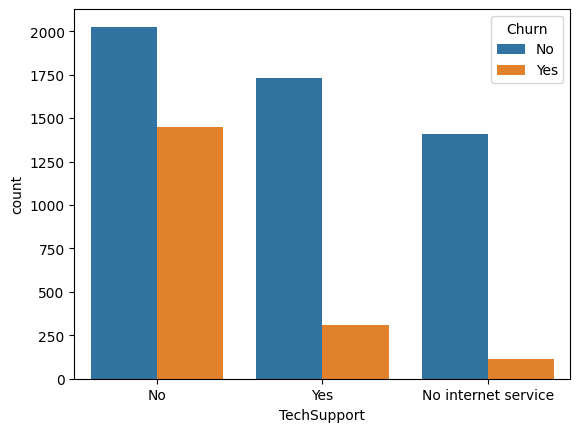

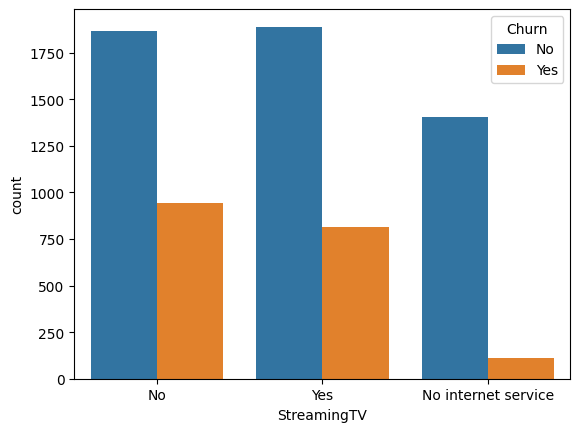

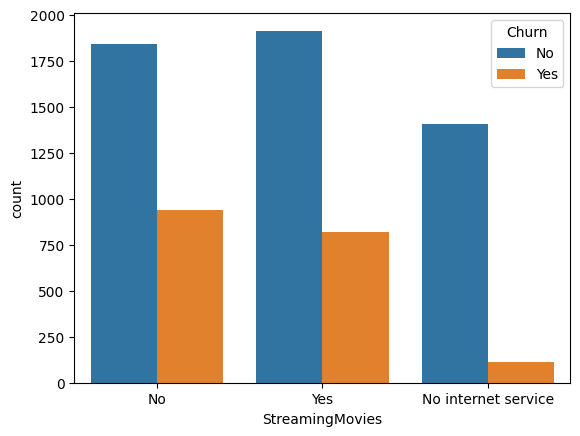

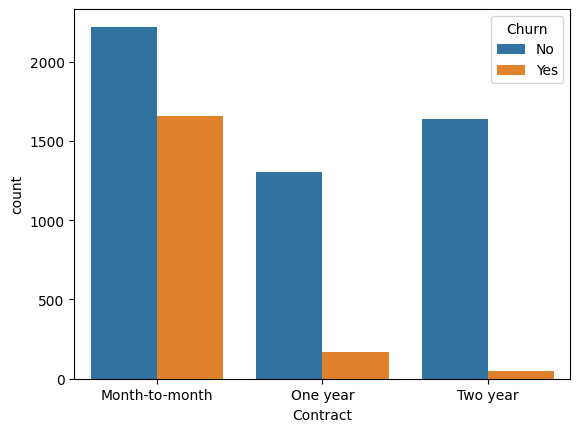

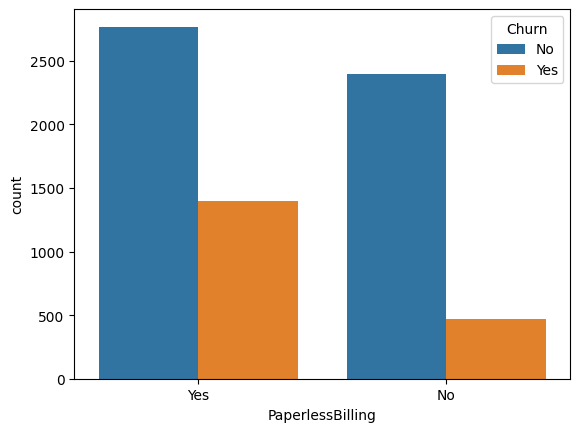

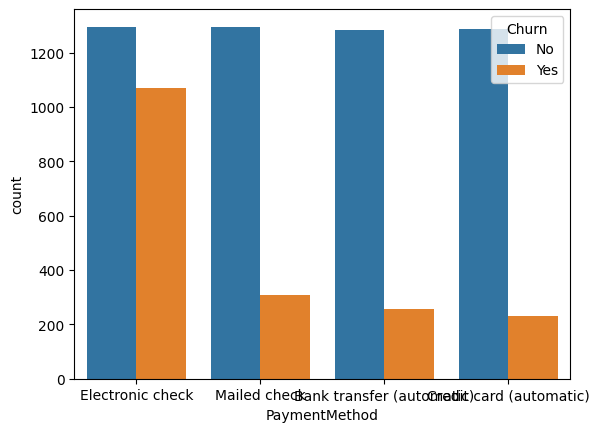

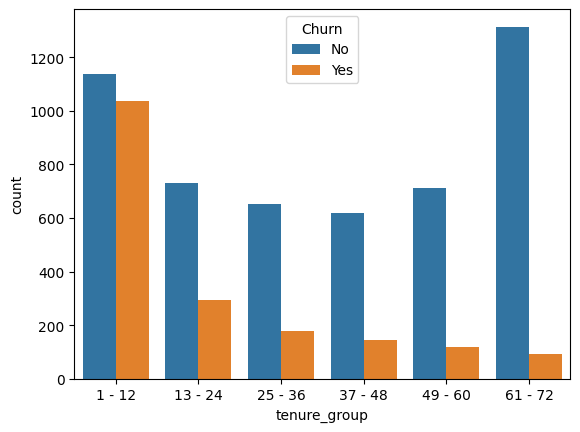

In [21]:
for i, predictor in enumerate(data_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data_copy, x=predictor, hue='Churn')

In [22]:
data_copy['Churn'] = np.where(data_copy.Churn == 'Yes',1,0)

In [23]:
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [24]:
data_copy_dumies = pd.get_dummies(data_copy)
data_copy_dumies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


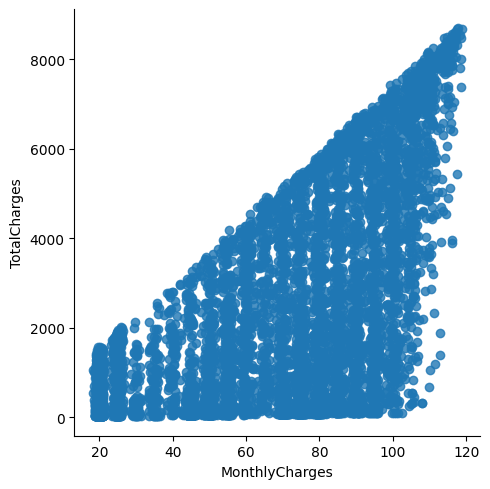

In [25]:
sns.lmplot(data=data_copy_dumies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

<ipython-input-26-f7410b51e9eb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_copy_dumies.MonthlyCharges[(data_copy_dumies["Churn"] == 0) ],
<ipython-input-26-f7410b51e9eb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_copy_dumies.MonthlyCharges[(data_copy_dumies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

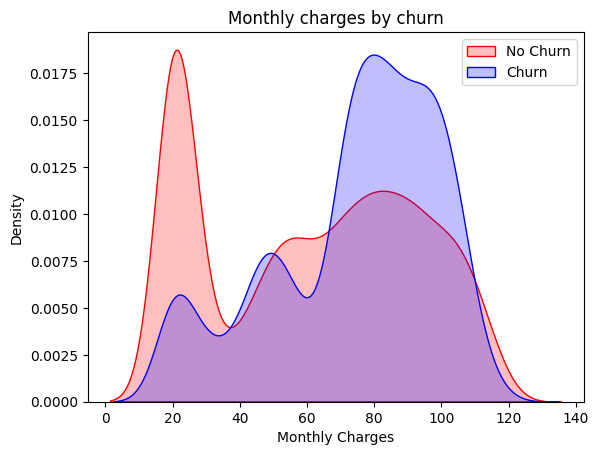

In [26]:

Mth = sns.kdeplot(data_copy_dumies.MonthlyCharges[(data_copy_dumies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_copy_dumies.MonthlyCharges[(data_copy_dumies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<ipython-input-27-a5d2f272417a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data_copy_dumies.TotalCharges[(data_copy_dumies["Churn"] == 0) ],
<ipython-input-27-a5d2f272417a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(data_copy_dumies.TotalCharges[(data_copy_dumies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

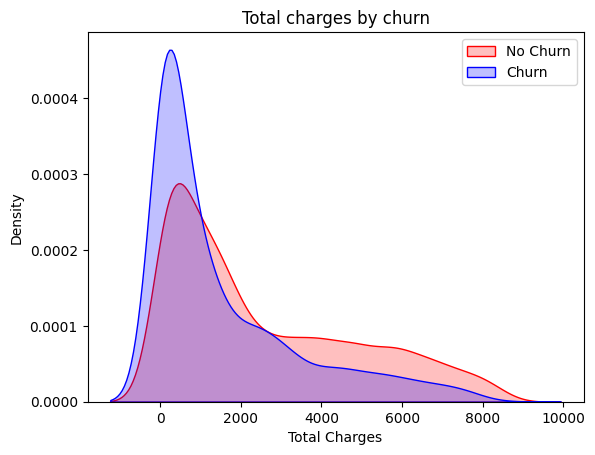

In [27]:
Tot = sns.kdeplot(data_copy_dumies.TotalCharges[(data_copy_dumies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_copy_dumies.TotalCharges[(data_copy_dumies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

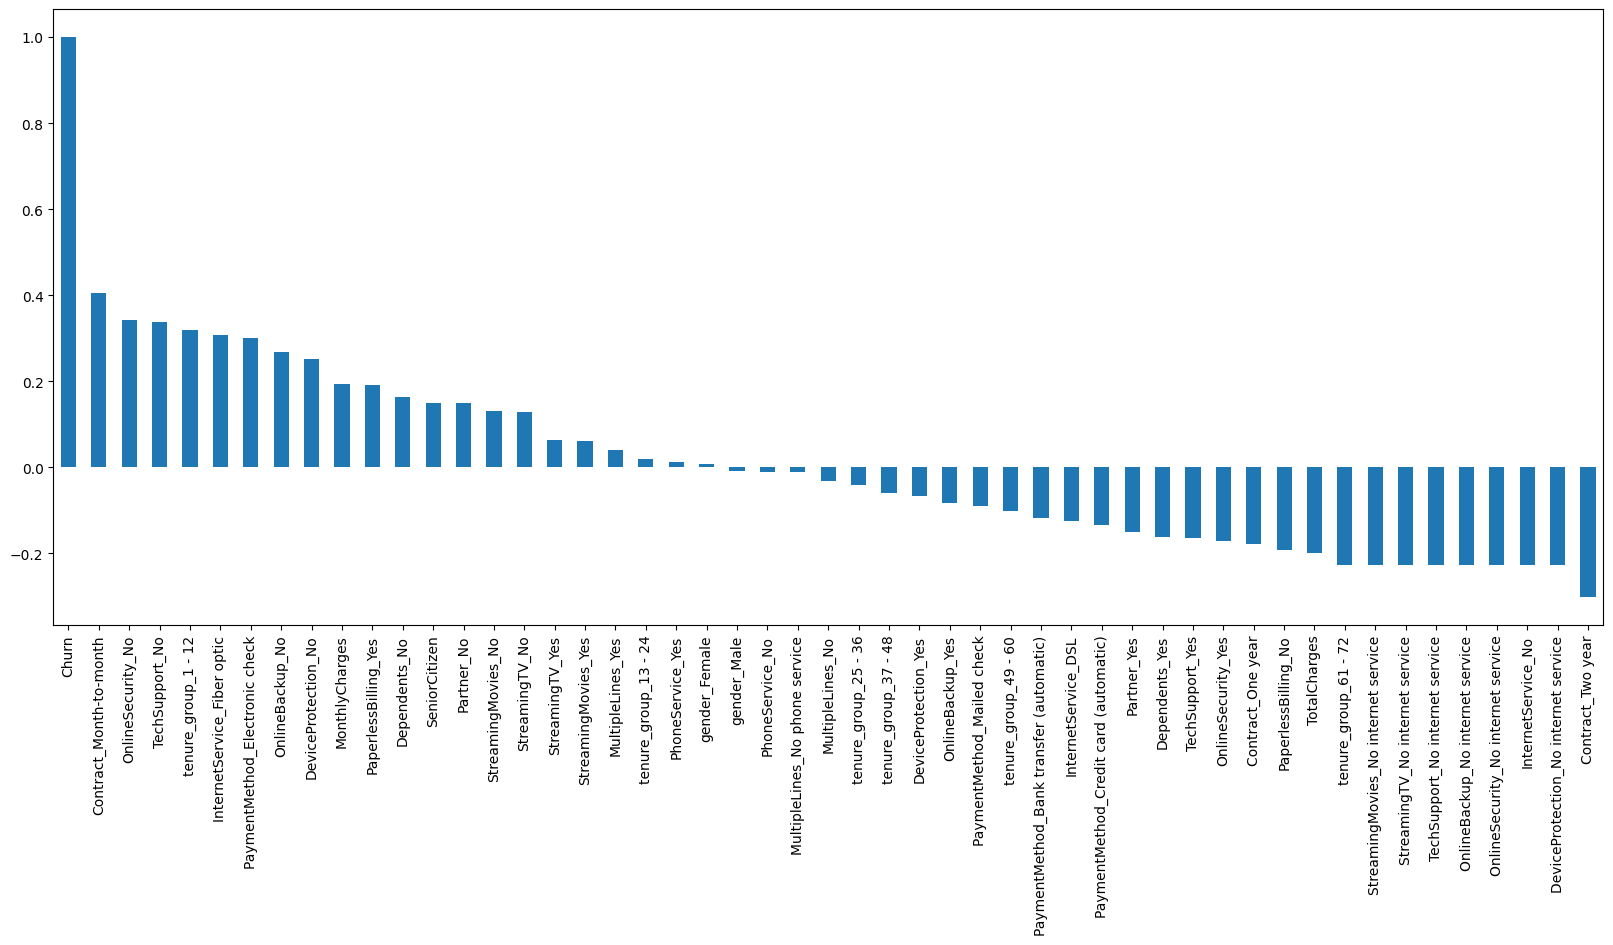

In [28]:
plt.figure(figsize=(20,8))
data_copy_dumies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')#with all predictors

In [29]:
#bivariate analysis
nochurners=data_copy.loc[data_copy["Churn"]==0]
churners=data_copy.loc[data_copy["Churn"]==1]

In [30]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=35)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

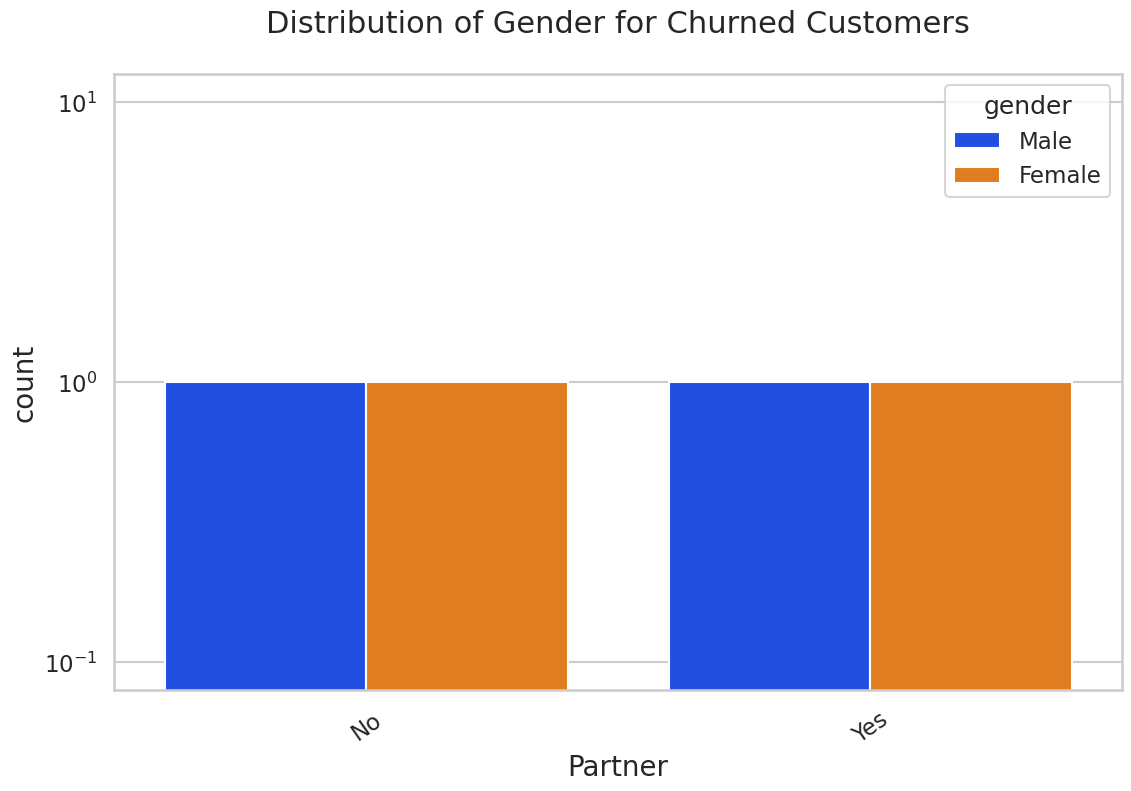

In [31]:
uniplot(churners,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

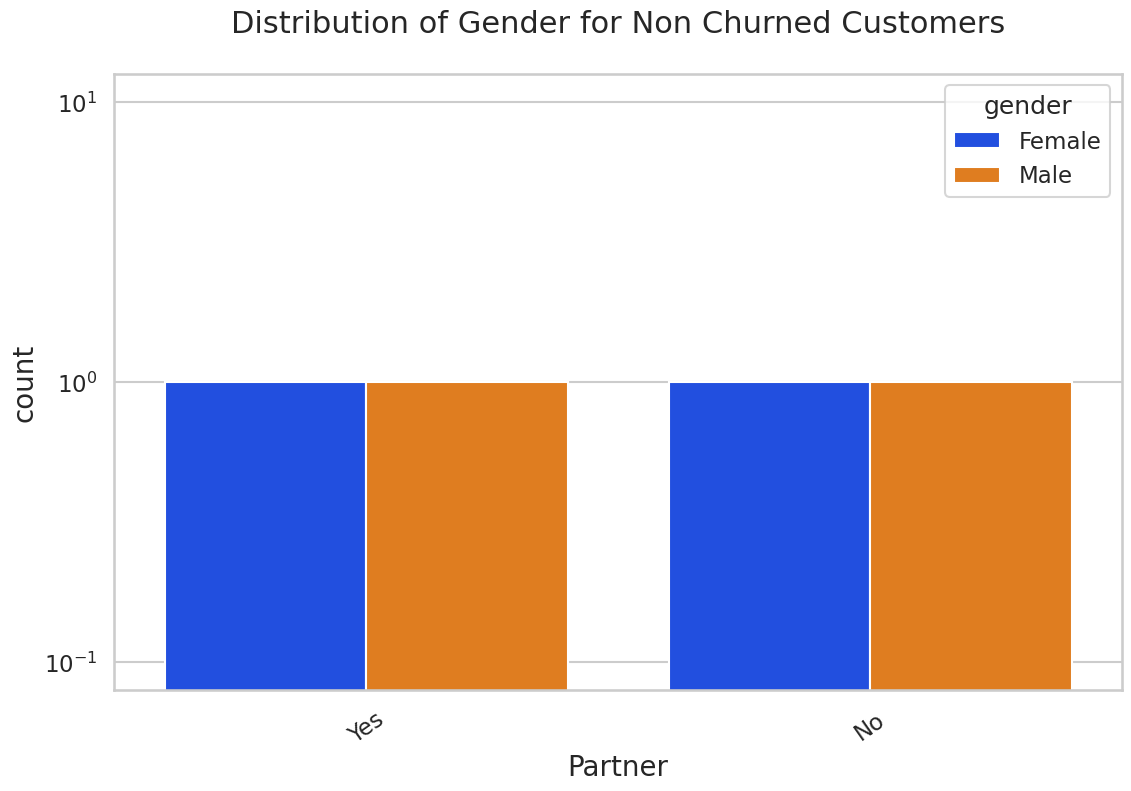

In [32]:
uniplot(nochurners,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


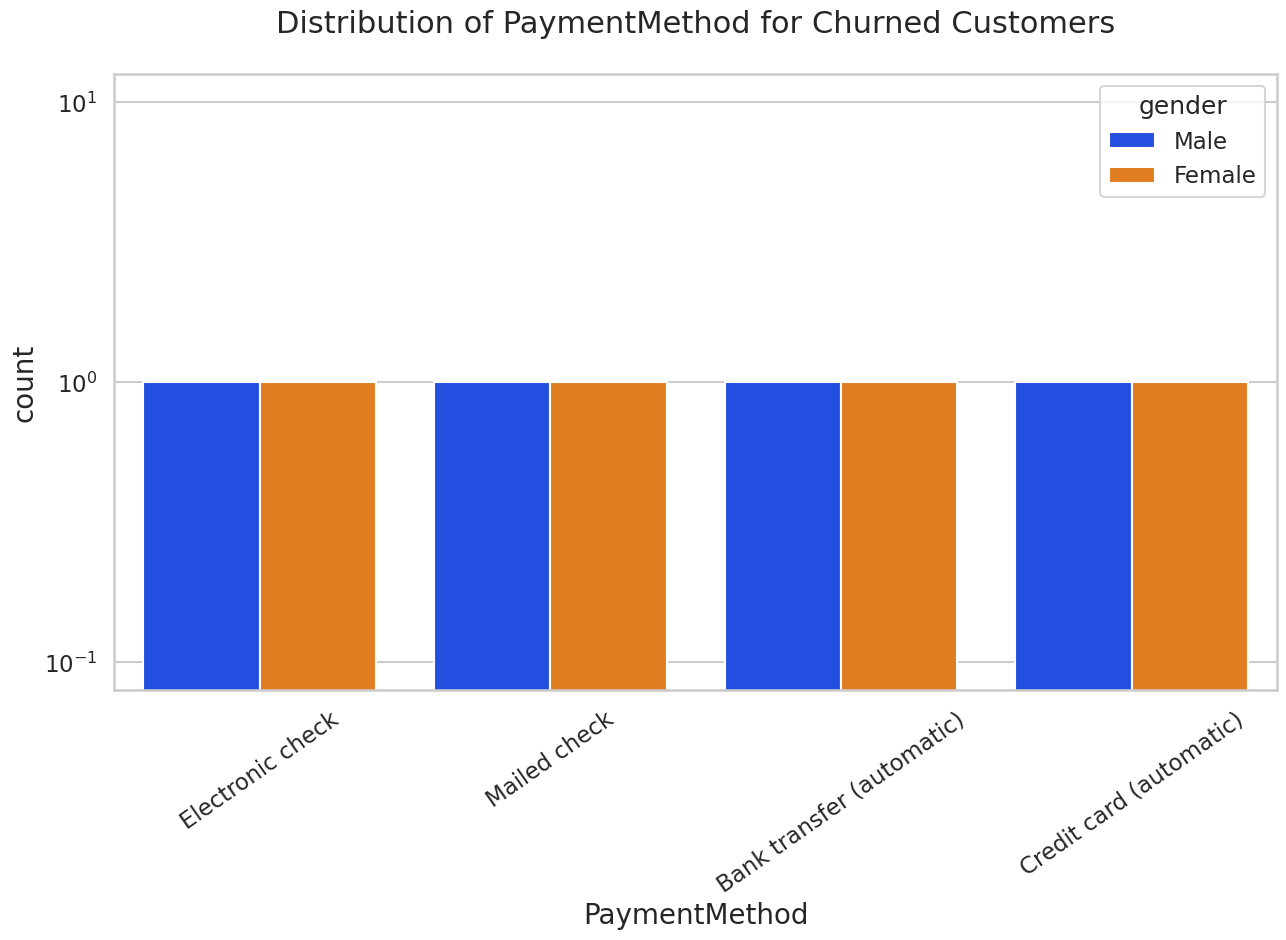

In [33]:
uniplot(churners,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


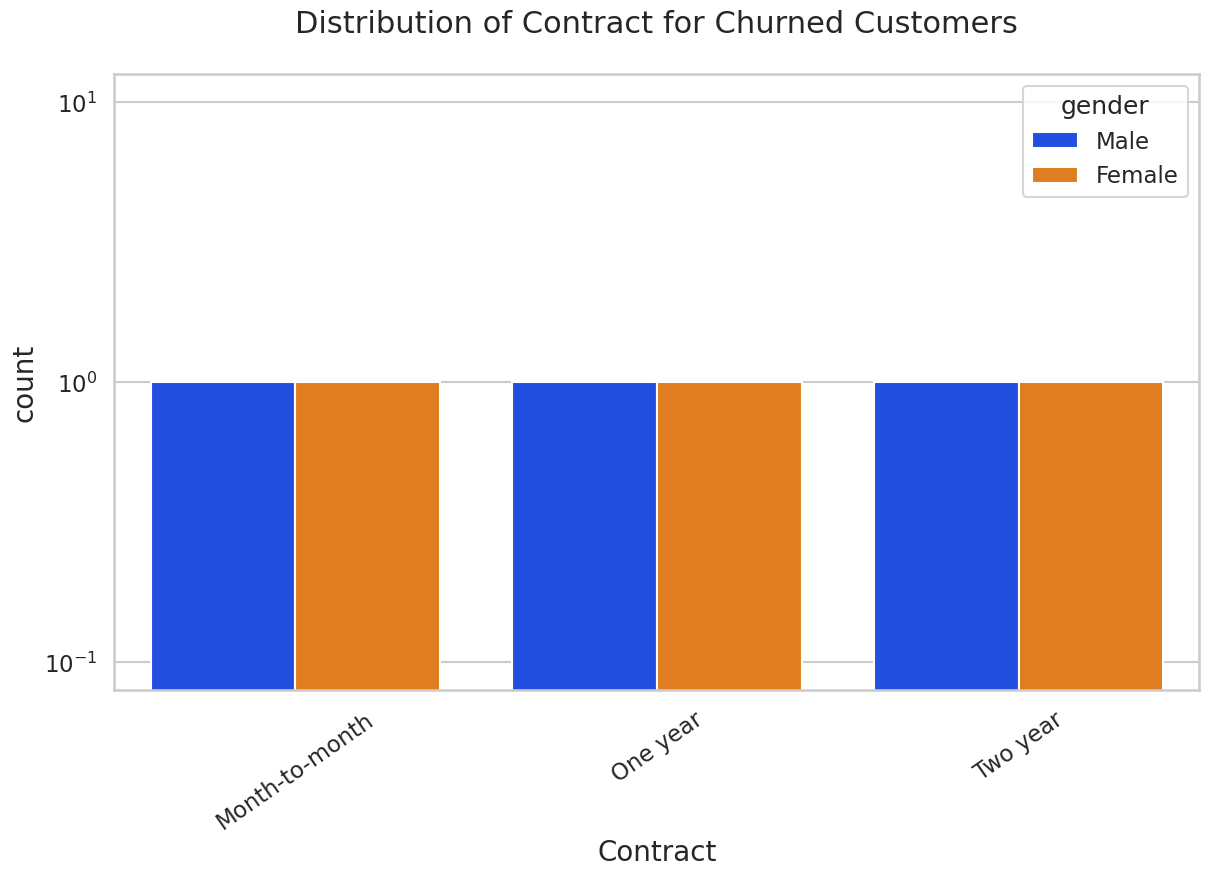

In [34]:
uniplot(churners,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


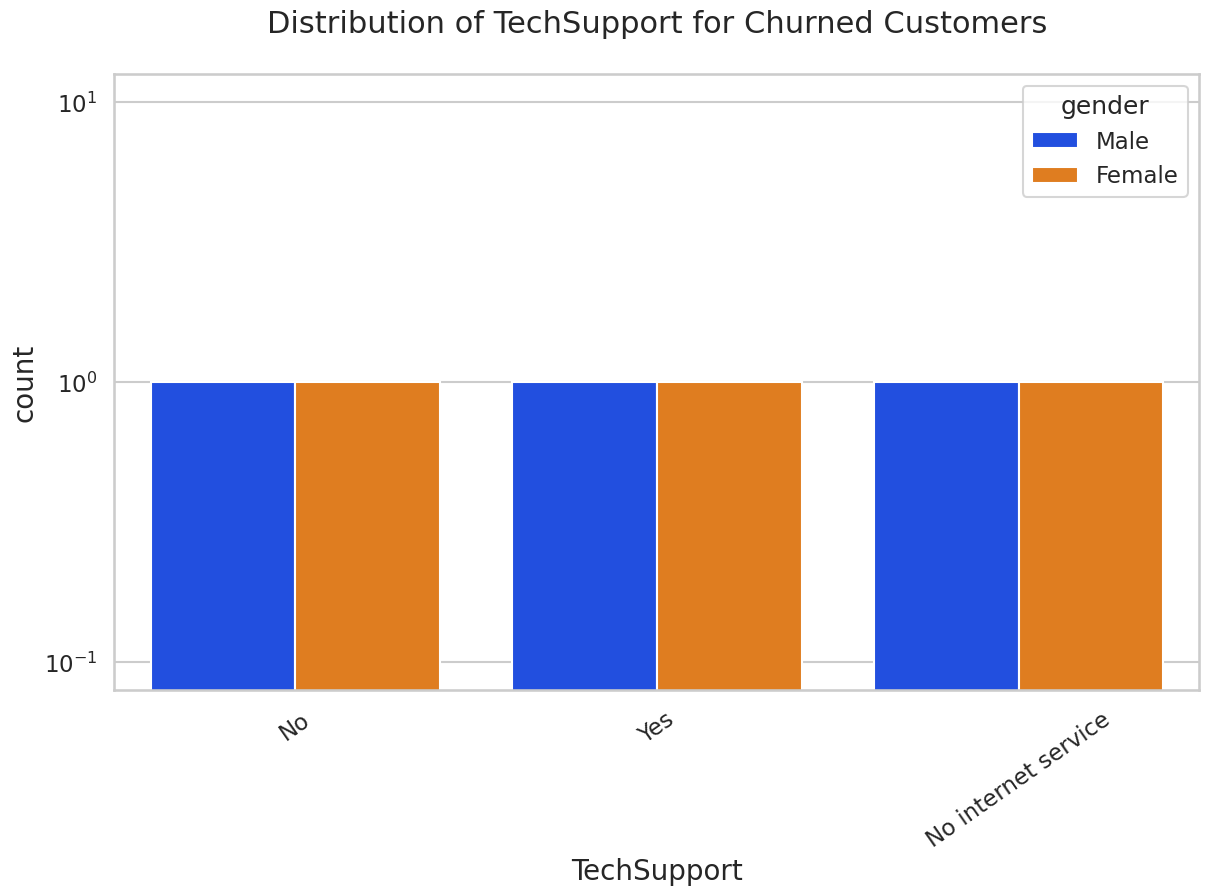

In [35]:
uniplot(churners,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


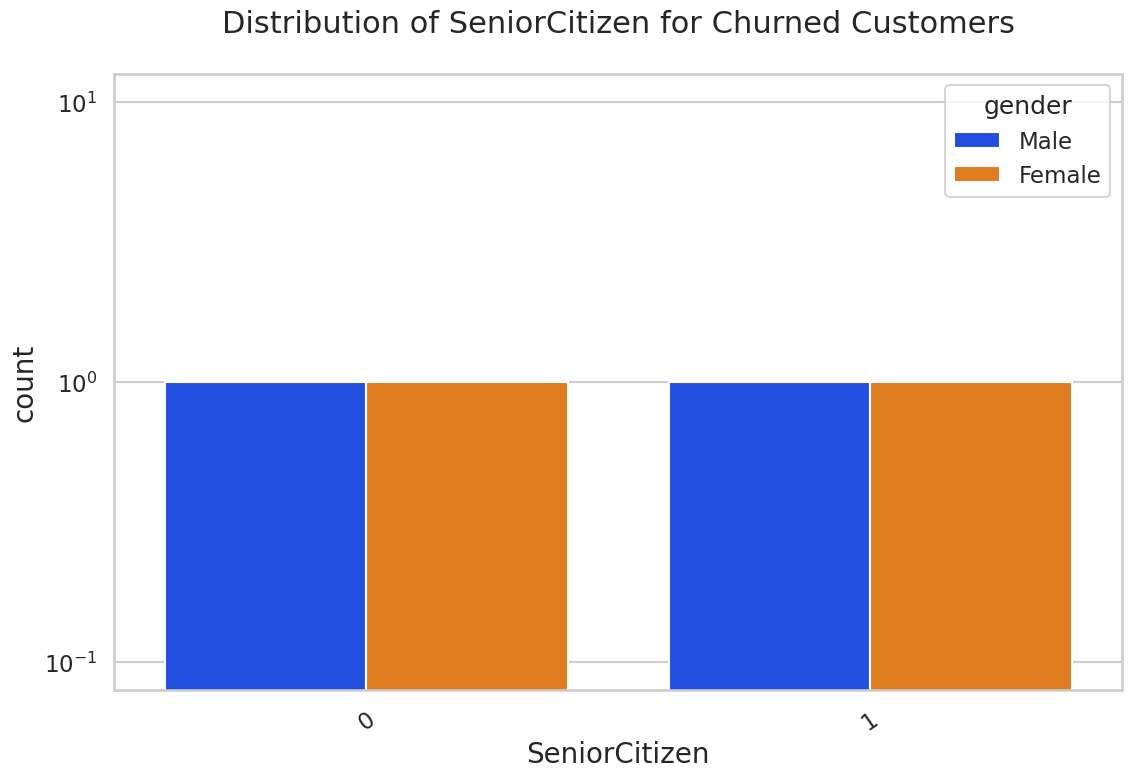

In [36]:
uniplot(churners,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


In [37]:
data_copy_dumies.to_csv('telco_churn_after_preprocess')


In [38]:
df=pd.read_csv("telco_churn_after_preprocess")
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)
del df['Unnamed: 0']
df.to_csv('final_feed_csv')
df.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

churn_column = df.iloc[:, 3]
features = df.drop(df.columns[3], axis=1)

churn_tensor = torch.tensor(churn_column.values, dtype=torch.int64)
features_tensor = torch.tensor(features.values, dtype=torch.float32)
print(churn_tensor)
print(features_tensor)

tensor([0, 0, 1,  ..., 0, 1, 0])
tensor([[0.0000e+00, 2.9850e+01, 2.9850e+01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.6950e+01, 1.8895e+03,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 5.3850e+01, 1.0815e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 2.9600e+01, 3.4645e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0000e+00, 7.4400e+01, 3.0660e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.0565e+02, 6.8445e+03,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]])


In [40]:
input_size = features_tensor.shape[1]

In [41]:
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
# Define dataset
class ChurnDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


# Create dataset and dataloader
dataset = ChurnDataset(features_tensor, churn_tensor)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


class ChurnNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):

        super(ChurnNN, self).__init__()
        self.finput = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc1_1= nn.Linear(hidden_size, hidden_size)
        self.fc1_2 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2_3 = nn.Linear(hidden_size * 2 , hidden_size * 3)
        self.fc3_2 = nn.Linear(hidden_size * 3, hidden_size * 2)
        self.fc2_1 = nn.Linear(hidden_size * 2, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(.05)
        self.batchNorm1 = nn.BatchNorm1d(hidden_size)
        self.batchNorm2 = nn.BatchNorm1d(hidden_size * 2)
        self.batchNorm3 = nn.BatchNorm1d(hidden_size * 3)

    def forward(self, x):
        x = x.float()
        x = self.finput(x)
        # x = self.batchNorm1(x)
        x = self.relu(x)
        x = self.fc1_1(x)
        x = self.relu(x)
        x = self.fc1_1(x)
        x = self.relu(x)
        x = self.fc1_1(x)
        x = self.relu(x)
        x = self.fc1_1(x)
        x = self.relu(x)
        x = self.output(x)



        # print(f"X is now: {x}")
        # output_probs = nn.functional.softmax(x, dim=1)
        output_probs = x
        return output_probs

model = ChurnNN(input_size, 256, 2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0006)
# 0.0006 - .34
# optimizer = optim.SGD(model.parameters(), lr=.001, momentum=0.9)
def train(model, optimizer, criterion, batch_size):
    # Set model to training mode
    model.train()
    num_epochs = 100

    for epoch in range(num_epochs):
        running_loss = 0.0

        # Iterate over the training dataset
        for inputs, targets in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Compute the loss

            # print(f"Outputs: {outputs}")
            # print(f"targets: {targets}")
            loss = criterion(outputs, targets)
            # print(f"loss: {loss}")

            # Backward pass
            loss.backward()

            # Update model parameters
            optimizer.step()

            # Accumulate the loss
            running_loss += loss.item() * inputs.size(0)

        # Calculate average loss for the epoch
        epoch_loss = running_loss / len(train_loader.dataset)

        # Print epoch statistics
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    print("Training complete")

train(model, optimizer, criterion, train_loader)

Epoch [1/100], Loss: 0.6168
Epoch [2/100], Loss: 0.5350
Epoch [3/100], Loss: 0.5138
Epoch [4/100], Loss: 0.4940
Epoch [5/100], Loss: 0.4826
Epoch [6/100], Loss: 0.4690
Epoch [7/100], Loss: 0.4647
Epoch [8/100], Loss: 0.4538
Epoch [9/100], Loss: 0.4524
Epoch [10/100], Loss: 0.4479
Epoch [11/100], Loss: 0.4413
Epoch [12/100], Loss: 0.4402
Epoch [13/100], Loss: 0.4485
Epoch [14/100], Loss: 0.4366
Epoch [15/100], Loss: 0.4409
Epoch [16/100], Loss: 0.4334
Epoch [17/100], Loss: 0.4320
Epoch [18/100], Loss: 0.4305
Epoch [19/100], Loss: 0.4309
Epoch [20/100], Loss: 0.4245
Epoch [21/100], Loss: 0.4274
Epoch [22/100], Loss: 0.4243
Epoch [23/100], Loss: 0.4258
Epoch [24/100], Loss: 0.4262
Epoch [25/100], Loss: 0.4260
Epoch [26/100], Loss: 0.4269
Epoch [27/100], Loss: 0.4193
Epoch [28/100], Loss: 0.4296
Epoch [29/100], Loss: 0.4221
Epoch [30/100], Loss: 0.4221
Epoch [31/100], Loss: 0.4248
Epoch [32/100], Loss: 0.4260
Epoch [33/100], Loss: 0.4191
Epoch [34/100], Loss: 0.4193
Epoch [35/100], Loss: 0

In [42]:
input_tensor = torch.tensor(features_tensor, dtype=torch.float32)

model.eval()

with torch.no_grad():
    predicted_outputs = model(input_tensor)

predicted_moves = torch.argmax(predicted_outputs, dim=1)
print(predicted_moves)


print(predicted_outputs)
print(churn_tensor)

<ipython-input-42-42efed418a43>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(features_tensor, dtype=torch.float32)


tensor([1, 0, 0,  ..., 0, 1, 0])
tensor([[-0.3541,  0.2420],
        [ 1.5643, -1.2819],
        [ 0.0037, -0.0356],
        ...,
        [ 0.6706, -0.5037],
        [-0.3540,  0.2175],
        [ 1.0392, -0.9422]])
tensor([0, 0, 1,  ..., 0, 1, 0])


In [51]:
#testing a new sample (modified from the data)
test_sample_tensor = features_tensor[1,:]
print('Input: ', test_sample_tensor)
print()
model.eval()

with torch.no_grad():
    predicted_outputs = model(test_sample_tensor)

predicted_moves = torch.argmax(predicted_outputs)
print('y_hat: ', predicted_moves)
churn = churn_tensor[1]
print('y: ', churn)


Input:  tensor([0.0000e+00, 5.6950e+01, 1.8895e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00])

y_hat:  tensor(0)
y:  tensor(0)
